In the last post, I managed to construct the MEPS dataset as a csv file. [Here's](https://bitbucket.org/soumyadsanyal/insight_project/src/e9a85003b670600f89f0329d6a27c13093a1e695/data/2013_consolidated_frame.csv?at=master) the result, for reference. (Warning: the file is large: about 250MB.)

The next thing to do is to take a look at the dataset, and see if we need to do any more processing. Since we have it written to disk as a csv file, I can import it using pandas' read_csv function. I may have to do a bit of plotting when I explore the dataset, so I'll go ahead and load all the packages I imagine I'll need for this.

Here's the boilerplate:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (10, 6)

Let's load the dataset as a pandas dataframe and see what it contains:

In [2]:
cd /home/soumya/research/insight/insight_project/data/

/home/soumya/research/insight/insight_project/data


In [3]:
ls

2013_consolidated_frame.csv     dsm_data_cleaned_columns.pkl
2013_test_with_dummies.pkl      dsm_data.csv
2013_train_with_dummies.pkl     dsm_data.pkl
2013_validate_with_dummies.pkl  dsm_data_scoped_variables.pkl
2013_with_dummies_.pkl          Untitled.ipynb
2013_with_dummies.pkl


In [4]:
data=pd.read_csv("./2013_consolidated_frame.csv")

First let's take a look at what features we have:

In [5]:
data.columns

Index(['DWELLING UNIT ID', ' PERSON NUMBER', ' PERSON ID (DUID + PID)',
       ' PANEL NUMBER', ' FAMILY ID (STUDENT MERGED IN) - R3/1',
       ' FAMILY ID (STUDENT MERGED IN) - R4/2',
       ' FAMILY ID (STUDENT MERGED IN) - R5/3',
       ' FAMILY ID (STUDENT MERGED IN) - 12/31/13',
       ' ANNUAL FAMILY IDENTIFIER', ' CPSFAMID', 
       ...
       ' TOTAL RX-PRV & TRI AMT 13', ' TOTAL RX-OTH COMBINED AMT 13',
       ' FINAL PERSON WEIGHT 2013', ' FINAL FAMILY WEIGHT 2013',
       ' POV ADJ FAMILY WGT-CPS FAM ON 12/31/13',
       ' FINAL SAQ PERSON WEIGHT 2013',
       ' FINAL DIABETES CARE SUPPLEMENT WEIGHT',
       ' VARIANCE ESTIMATION STRATUM - 2013',
       ' VARIANCE ESTIMATION PSU - 2013', ' '],
      dtype='object', length=1792)

The first thing I get from this is that I need to learn what these features actually are, so I'll have to look up the MEPS survey methodology or documentation in order to figure out what these features actually are. There are 1792 features for each record, so this may be a bit involved.

The second thing I get out of looking at the column names is that they really do need a bit of cleanup. For example, the first feature is called "DWELLING UNIT ID", but the second is called " PERSON NUMBER" (note the extra space at the beginning). This seems to be a running problem in the column names. There's also a column right at the end with no name.

There are 1792 column names to fix, which is entirely too many to fix by hand.

On the other hand, it looks like the cleanup consists of a couple of simple rules:

    Remove the initial space in the feature name
    Pop the last entry from the column names

Let's write a function to do the first job:

In [6]:
def clean_columns(theframe):
    temp=theframe.columns.map(lambda x: (((str(x).lstrip()).rstrip()))).copy()
    theframe.columns=temp
    return theframe

Let's try this on our dataframe and see if it does the first task.

In [7]:
data1=clean_columns(data)
data1.head()

,DWELLING UNIT ID,PERSON NUMBER,PERSON ID (DUID + PID),PANEL NUMBER,FAMILY ID (STUDENT MERGED IN) - R3/1,FAMILY ID (STUDENT MERGED IN) - R4/2,FAMILY ID (STUDENT MERGED IN) - R5/3,FAMILY ID (STUDENT MERGED IN) - 12/31/13,ANNUAL FAMILY IDENTIFIER,CPSFAMID,...,TOTAL RX-PRV & TRI AMT 13,TOTAL RX-OTH COMBINED AMT 13,FINAL PERSON WEIGHT 2013,FINAL FAMILY WEIGHT 2013,POV ADJ FAMILY WGT-CPS FAM ON 12/31/13,FINAL SAQ PERSON WEIGHT 2013,FINAL DIABETES CARE SUPPLEMENT WEIGHT,VARIANCE ESTIMATION STRATUM - 2013,VARIANCE ESTIMATION PSU - 2013,
0,20004,101,20004101,17,A,A,A,A,A,A,...,0,0,6594.801768,6263.398994,6263.398994,7960.062940,0,1109,1,NaN
1,20004,102,20004102,17,A,A,A,A,A,A,...,0,0,7144.183132,6263.398994,6263.398994,7971.337575,0,1109,1,NaN
2,20004,103,20004103,17,A,A,A,A,A,A,...,77,0,5616.278666,6263.398994,6263.398994,0.000000,0,1109,1,NaN
3,20005,101,20005101,17,A,A,A,A,A,A,...,0,53,4045.586998,6080.690177,6080.690177,5604.764494,0,1109,2,NaN
4,20005,102,20005102,17,A,A,A,A,A,A,...,0,0,6901.505814,6080.690177,6080.690177,7781.609891,0,1109,2,NaN


So far so good; now I just need to get rid of the last column.

In [8]:
data1=data1.drop("",axis=1)
data1.head()

,DWELLING UNIT ID,PERSON NUMBER,PERSON ID (DUID + PID),PANEL NUMBER,FAMILY ID (STUDENT MERGED IN) - R3/1,FAMILY ID (STUDENT MERGED IN) - R4/2,FAMILY ID (STUDENT MERGED IN) - R5/3,FAMILY ID (STUDENT MERGED IN) - 12/31/13,ANNUAL FAMILY IDENTIFIER,CPSFAMID,...,TOT RX-OTH UNCLASS SRCE AMT 13,TOTAL RX-PRV & TRI AMT 13,TOTAL RX-OTH COMBINED AMT 13,FINAL PERSON WEIGHT 2013,FINAL FAMILY WEIGHT 2013,POV ADJ FAMILY WGT-CPS FAM ON 12/31/13,FINAL SAQ PERSON WEIGHT 2013,FINAL DIABETES CARE SUPPLEMENT WEIGHT,VARIANCE ESTIMATION STRATUM - 2013,VARIANCE ESTIMATION PSU - 2013
0,20004,101,20004101,17,A,A,A,A,A,A,...,0,0,0,6594.801768,6263.398994,6263.398994,7960.062940,0,1109,1
1,20004,102,20004102,17,A,A,A,A,A,A,...,0,0,0,7144.183132,6263.398994,6263.398994,7971.337575,0,1109,1
2,20004,103,20004103,17,A,A,A,A,A,A,...,0,77,0,5616.278666,6263.398994,6263.398994,0.000000,0,1109,1
3,20005,101,20005101,17,A,A,A,A,A,A,...,0,0,53,4045.586998,6080.690177,6080.690177,5604.764494,0,1109,2
4,20005,102,20005102,17,A,A,A,A,A,A,...,0,0,0,6901.505814,6080.690177,6080.690177,7781.609891,0,1109,2


Great, that worked. Alright, let's roll that into the clean_columns function:

In [9]:
def clean_columns(theframe):
    temp=theframe.columns.map(lambda x: (((str(x).lstrip()).rstrip()))).copy()
    theframe.columns=temp
    theframe=theframe.drop("",axis=1)
    return theframe

In [10]:
data=clean_columns(data)

In [11]:
data.columns

Index(['DWELLING UNIT ID', 'PERSON NUMBER', 'PERSON ID (DUID + PID)',
       'PANEL NUMBER', 'FAMILY ID (STUDENT MERGED IN) - R3/1',
       'FAMILY ID (STUDENT MERGED IN) - R4/2',
       'FAMILY ID (STUDENT MERGED IN) - R5/3',
       'FAMILY ID (STUDENT MERGED IN) - 12/31/13', 'ANNUAL FAMILY IDENTIFIER',
       'CPSFAMID', 
       ...
       'TOT RX-OTH UNCLASS SRCE AMT 13', 'TOTAL RX-PRV & TRI AMT 13',
       'TOTAL RX-OTH COMBINED AMT 13', 'FINAL PERSON WEIGHT 2013',
       'FINAL FAMILY WEIGHT 2013', 'POV ADJ FAMILY WGT-CPS FAM ON 12/31/13',
       'FINAL SAQ PERSON WEIGHT 2013', 'FINAL DIABETES CARE SUPPLEMENT WEIGHT',
       'VARIANCE ESTIMATION STRATUM - 2013', 'VARIANCE ESTIMATION PSU - 2013'],
      dtype='object', length=1791)

Perfect.

One thing worth remarking on is that I've actually extracted the variable **description** rather than the variable name in this step. This was a deliberate decision, as I find it much more intuitive to work with variable names like "MOST RECENT COLONOSCOPY (>39) - R5/3" rather than the variable name "CLNTST53". Those of you familiar with the constraints of variable names in SQL databases will object that this is going to cause trouble in the future. I decided to go with the more descriptive variable names, and write a coding-decoding function to help move data in and out of SQL databases a bit later in the project. Overall, I found this to be a reasonable choice.

To this end, let me go ahead and get rid of the spaces in the variables names before that causes any bugs down the road.

In [12]:
def underscore_the_headers(data):
    temp=(data.columns).copy()
    result=[term.replace(' ','_') for term in temp]
    data.columns=result.copy()
    return data

Let's run the data columns through this function:

In [13]:
data=underscore_the_headers(data)

In [14]:
data.columns

Index(['DWELLING_UNIT_ID', 'PERSON_NUMBER', 'PERSON_ID_(DUID_+_PID)',
       'PANEL_NUMBER', 'FAMILY_ID_(STUDENT_MERGED_IN)_-_R3/1',
       'FAMILY_ID_(STUDENT_MERGED_IN)_-_R4/2',
       'FAMILY_ID_(STUDENT_MERGED_IN)_-_R5/3',
       'FAMILY_ID_(STUDENT_MERGED_IN)_-_12/31/13', 'ANNUAL_FAMILY_IDENTIFIER',
       'CPSFAMID', 
       ...
       'TOT_RX-OTH_UNCLASS_SRCE_AMT_13', 'TOTAL_RX-PRV_&_TRI_AMT_13',
       'TOTAL_RX-OTH_COMBINED_AMT_13', 'FINAL_PERSON_WEIGHT_2013',
       'FINAL_FAMILY_WEIGHT_2013', 'POV_ADJ_FAMILY_WGT-CPS_FAM_ON_12/31/13',
       'FINAL_SAQ_PERSON_WEIGHT_2013', 'FINAL_DIABETES_CARE_SUPPLEMENT_WEIGHT',
       'VARIANCE_ESTIMATION_STRATUM_-_2013', 'VARIANCE_ESTIMATION_PSU_-_2013'],
      dtype='object', length=1791)

Great!

Next, I'd like to learn a bit more about what these features are. The main thing to keep in mind is that having a large number of features will make our model very unwieldy. 

The crucial thing for this model is for it to be as **useful** as possible, and if I have to collect 1700 features or so about a person before I can give them any useful feedback, this model won't be used by anyone.

Secondly, for the purposes of my project, I'm most concerned with how the demographic, economic, or health status of a consumer drives cost, since these are the things that can inform how we choose to design the market for healthcare services.



To this end, let's take a look at what's available at the MEPS [page](http://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-163) that points to the dataset. This page gives us two helpful pieces of information: the first is the [documentation](http://meps.ahrq.gov/mepsweb/data_stats/download_data/pufs/h163/h163doc.shtml) for the dataset  and the second is the [codebook](http://meps.ahrq.gov/mepsweb/data_stats/download_data_files_codebook.jsp?PUFId=H163), which we've already used in constructing the csv file.

While the codebook contains the entire listing of variables in the dataset and the start-end points in the ASCII file, it does not tell us what values the variables actually take. To be fair, the variable names are fairly descriptive so we might be able to make educated guesses here, but a quick query of one of the columns in the dataset we've constructed:



In [15]:
data["HIGH_CHOLESTEROL_DIAGNOSIS_(>17)"].describe()

count    36940.000000
mean         0.928533
std          1.355903
min         -9.000000
25%         -1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: HIGH_CHOLESTEROL_DIAGNOSIS_(>17), dtype: float64

raises the question: what do the values of this variable mean? It has a max of 2, and a min of -9. That doesn't correspond to any prior I currently have over the values of a diagnosis of high cholesterol. I'd expect to see things like positive, negative, not tested, and so on. Let's take a more detailed look:

In [16]:
data["HIGH_CHOLESTEROL_DIAGNOSIS_(>17)"].value_counts()

 2    18967
-1    10382
 1     7497
-8       49
-7       24
-9       21
dtype: int64

The most frequently populated values are 2, 1 and -1, but there are also records with values -8, -7 and -9.

This warrants a closer look at the documentation. A quick search for "cholesterol" turns up:

    High Cholesterol

    Questions about high cholesterol were asked of persons aged 18 or older. Consequently, persons aged 17 or younger were coded as “Inapplicable” (-1) on these variables. CHOLDX ascertained whether the person had ever been diagnosed as having high cholesterol. Through 2007, a person-level variable (CHLAGE) indicated the age of diagnosis for high cholesterol on the Person-Level Use PUF. The age of diagnosis for high cholesterol (CHOLAGED) is included in this file. This variable is top-coded to 85 years of age.



which is somewhat helpful, but doesn't explain the use of the values -8 and -9.

Further digging into the documentation yields the following table:

    2.2 Reserved Codes

    The following reserved code values are used:

    Value 	Definition
    -1 INAPPLICABLE 	Question was not asked due to skip pattern
    -2 DETERMINED IN PREVIOUS ROUND 	Question was not asked in round because there was no change in current main job since previous round
    -7 REFUSED 	Question was asked and respondent refused to answer question
    -8 DK 	Question was asked and respondent did not know answer
    -9 NOT ASCERTAINED 	Interviewer did not record the data
    -10 HOURLY WAGE >= $76.96 	Hourly wage was top-coded for confidentiality
    -13 INITIAL WAGE IMPUTED 	Hourly wage was previously imputed so an updated wage is not included in this file

This is helpful; it indicates that the most relevant levels for our analysis ought to be the following three:

1. Positive diagnosis of high cholesterol
2. Negative diagnosis of high cholesterol
3. Inapplicable to respondent

and given the low population in levels below -1, we can either aggregate these data points with level==-1, or discard them entirely. In the following analysis, we choose to discard them.

A final question that needs to be asked at this step is which level corresponds to a positive diagnosis of high cholesterol? A close look at the documentation indicates that level==1 corresponds to having the condition, and level==2 corresponds to not having the condition. Knowing which level is which doesn't particularly affect the computations that generate our models going forward, but it is important for being able to interpret the models.

As a quick sanity check, let's get a visualization of the distribution of the data between these levels:

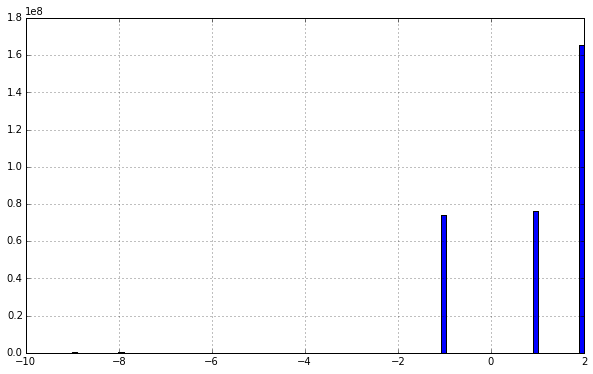

In [17]:
data["HIGH_CHOLESTEROL_DIAGNOSIS_(>17)"].hist(bins=100, weights=data["FINAL_PERSON_WEIGHT_2013"])

Of the respondents for whom the question was applicable, it looks like the ratio of level==1 to level==2 is 7/17 or about 2/5. This is close to the CDC estimates of the prevalence of high cholesterol amongst American adults: http://www.cdc.gov/dhdsp/data_statistics/fact_sheets/fs_cholesterol.htm .

Next, instead of using level==1 or level==2 to describe the values that a categorical feature takes, I'd like to translate the levels of these categorical variables into their descriptions so my plots are easier to read.

Here's a dictionary that implements this using the documentation quoted above:

In [18]:
interpretation={}

interpretation["categorical"]={
                1: "Yes",
                2: "No",
                -1: "Inapplicable",
                -2: "Determined in previous round",
                -7: "Refused",
                -8: "Don't know",
                -9: "Not ascertained",
                -10: "HOURLY WAGE >= $76.96",
                -13: "INITIAL WAGE IMPUTED"
                }

interpretation["RACE/ETHNICITY_(EDITED/IMPUTED)"]={1: "HISPANIC",
                        2: "NON-HISPANIC WHITE ONLY",
                        3: "NON-HISPANIC BLACK ONLY",
                        4: "NON-HISPANIC ASIAN ONLY",
                        5: "NON-HISPANIC OTHER RACE OR MULTIPLE RACE"
                        }

interpretation["SEX"]={1: "MALE", 2: "FEMALE"}

interpretation["MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)"]={-9: "NOT ASCERTAINED",
                           -8: "DK",
                           -7: "REFUSED",
                           1: "MARRIED",
                           2: "WIDOWED",
                           3: "DIVORCED",
                           4: "SEPARATED",
                           5: "NEVER MARRIED",
                           6: "UNDER 16 - INAPPLICABLE"
                          }

interpretation["EDUCATION_RECODE_(EDITED)"]={-9: "NOT ASCERTAINED",
                             -8: "DK",
                             -7: "REFUSED",
                             -1: "INAPPLICABLE OR UNDER 5",
                             1: "LESS THAN/EQUAL TO 8TH GRADE",
                             2: "9 - 12TH GRADE, NO HS DIPLOMA OR GED",
                             13: "GED OR HS GRAD",
                             14: "BEYOND HS,COLLEGE(NO 4YR DEG),ASSOC DEG",
                             15: "4-YEAR COLLEGE DEGREE, BACHELOR'S DEGREE",
                             16: "MASTER'S, DOCTORATE, OR PROFESSIONAL DEG"
                             }

interpretation["INDUSTRY_GROUP_RD_3/1_CMJ"]={-9: "NOT ASCERTAINED",
                            -1: "INAPPLICABLE",
                            1: "NATURAL RESOURCES",
                            2: "MINING",
                            3: "CONSTRUCTION",
                            4: "MANUFACTURING",
                            5: "WHOLESALE AND RETAIL TRADE",
                            6: "TRANSPORTATION AND UTILITIES",
                            7: "INFORMATION",
                            8: "FINANCIAL ACTIVITIES",
                            9: "PROFESSIONAL AND BUSINESS SERVICES",
                            10: "EDUCATION, HEALTH, AND SOCIAL SERVICES",
                            11: "LEISURE AND HOSPITALITY",
                            12: "OTHER SERVICES",
                            13: "PUBLIC ADMINISTRATION",
                            14: "MILITARY",
                            15: "UNCLASSIFIABLE INDUSTRY"}

interpretation["OCCUPATION_GROUP_RD_3/1_CMJ"]={
    -9: "NOT ASCERTAINED",
    -1: "INAPPLICABLE",
    1: "MANAGEMENT, BUSINESS, AND FINANCIAL OPER",
    2: "PROFESSIONAL AND RELATED OCCUPATIONS", 
    3: "SERVICE OCCUPATIONS",
    4: "SALES AND RELATED OCCUPATIONS", 
    5: "OFFICE AND ADMINISTRATIVE SUPPORT",
    6: "FARMING, FISHING, AND FORESTRY",
    7: "CONSTRUCTION, EXTRACTION, AND MAINTENANC",
    8: "PRODUCTION, TRNSPORTATION, MATRL MOVING", 
    9: "MILITARY SPECIFIC OCCUPATIONS",
    11: "UNCLASSIFIABLE OCCUPATION"}

interpretation["CENSUS_REGION_AS_OF_12/31/13"]={-1: "Inapplicable",
                                                1:"Northeast",
                                                2:"Midwest",
                                                3:"South",
                                                4:"West"}

interpretation["EMPLOYMENT_STATUS_RD_3/1"]={-9: "NOT ASCERTAINED",
                                            -8: "DK",
                                            -7: "REFUSED",
                                            -1: "INAPPLICABLE",
                                            1: "EMPLOYED AT RD 3/1 INT DATE",
                                            2: "JOB TO RETURN TO AT RD 3/1 INT DATE",
                                            3: "JOB DURING RD 3/1 REF PERIOD",
                                            4: "NOT EMPLOYED DURING RD 3/1"}

interpretation["FULL_YEAR_INSURANCE_COVERAGE_STATUS_2013"]={
     1: "<65 ANY PRIVATE",
     2: "<65 PUBLIC ONLY",
     3: "<65 UNINSURED",
     4: "65+ EDITED MEDICARE ONLY",
     5: "65+ EDITED MEDICARE AND PRIVATE",
     6: "65+ EDITED MEDICARE AND OTH PUB ONLY",
     7: "65+ UNINSURED",
     8: "65+ NO MEDICARE AND ANY PUBLIC/PRIVATE"
    }



Let's write a function that implements this as necessary for a feature.

The features whose levels I need to interpret in this way are all categorical features; the documentation indicates that the continuous variables aren't generally coded (apart from top-coding to preserve privacy). Accordingly, it would help to be able to automatically determine whether the feature I'm looking at is categorical or continuous. I'll try implementing the following rough rule of thumb: if a feature has less than 10-20 levels, I'll assume it's categorical, and otherwise I'll assume it's continuous.

In [19]:
def check_discrete(data,thevariable):
    if len(data[thevariable].unique())>19 or "AGE_OF" in thevariable or "AGE_AS" in thevariable or "#" in thevariable:
        return "continuous"
    else:
        return "categorical"

Let's classify the features in the dataset:

In [20]:
continuous=[term for term in data.columns if check_discrete(data,term)=="continuous"]
categorical=[term for term in data.columns if check_discrete(data,term)=="categorical"]

Finally, I'll write a function that interprets the levels of the features in any categorical variable:

In [21]:
def interpret_vectorized(data,feature):
    if feature in interpretation:
        return data[feature].map(lambda x: interpretation[feature][x])
    elif feature in categorical:
        return data[feature].map(lambda x: interpretation["categorical"][x])
    else:
        return data[feature].map(lambda x: "inapplicable" if x<0 else x)

Here's an example of how it transforms the levels in a plot:

In [22]:
thevar='HIGH_CHOLESTEROL_DIAGNOSIS_(>17)'

In [23]:
def explore(data,thevar):
    temp=interpret_vectorized(data,thevar)
    w=data["FINAL_PERSON_WEIGHT_2013"]
    temp=pd.concat([temp,w],axis=1)
    temp["ones"]=1
    temp["scaled"]=temp["ones"]*temp["FINAL_PERSON_WEIGHT_2013"]
    result=temp.groupby([thevar])["scaled"].sum()
    ax=result.plot(kind="bar",title=thevar)
    ax.set_ylabel("Count")
    plt.show()

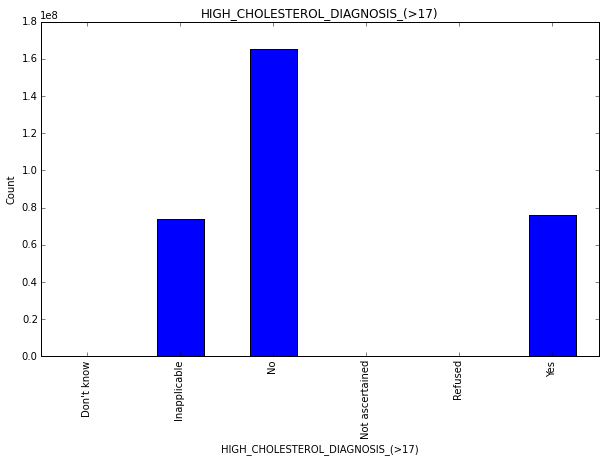

In [24]:
explore(data,thevar)

That visualization was a nice way of learning something about the data, and confirming a hunch we had about how to interpret it. In fact, simple visual plots of different features in the dataset are a crucial way of getting some initial insight into the data, and helping us prioritize the most fruitful approaches for modeling the data.

To fix ideas, let's scope down what we want to go into our model.

Explicitly, we'd like to be able to answer the following questions: which (if any) of the following features about a person determine what they will pay for healthcare in a year?

1. Demographic information:
    1. Age
    2. Sex
    3. Race/Ethnicity
    4. Marital Status
    5. Educational attainment
    6. Census region
2. Income information (these are all top-coded in the dataset for confidentiality reasons):
3. Idiosyncratic health status variables:
    1. High blood pressure, including multiple diagnoses
    2. Heart disease (including coronary heart disease, angina, myocardial infarction, and other unspecified heart disease)
    3. Stroke
    4. Emphysema
    5. Chronic Bronchitis
    6. High cholesterol, including the age of diagnosis
    7. Cancer
    8. Diabetes
    9. Joint pain
    10. Arthritis
    11. Asthma
    12. Attention Deficit Hyperactivity Disorder/Attention Deficit Disorder (ADHD/ADD)
4. Adult Body Mass Index
5. Health Insurance Variables
    1. Public Insurance Indicators
    2. Private Insurance Indicators
    3. Any Insurance Indicators
    4. HMO plan
6. Utilization, expenditure and source of payments information

It's fair to say that this is a lot of information to process. One thing that stands out here is that there are a great number of features already recorded for us in this dataset; this is in sharp contrast to some projects I've done using text and/or social media data, in which the hard part of the modeling process is feature construction in some appropriate way.

Since there is such a rich variety of features, I imagine most of the feature engineering in this project will amount to bucketing variables and levels in appropriate ways to optimize explained variation, rather than constructing new features from scratch.

To this end, let's make a list of the exact features we want to start working with.

1. AGE AS OF 12/31/13 (EDITED/IMPUTED)
2. SEX
3. RACE/ETHNICITY (EDITED/IMPUTED)
4. MARITAL STATUS-12/31/13 (EDITED/IMPUTED)
5. FAMILY'S TOTAL INCOME
6. ADULT BODY MASS INDEX (>17) - RD 5/3
7. HIGH BLOOD PRESSURE DIAG (>17)
8. CORONARY HRT DISEASE DIAG (>17)
9. AGE OF DIAGNOSIS-HIGH BLOOD PRESSURE
10. MULT DIAG HIGH BLOOD PRESS (>17)
11. AGE OF DIAGNOSIS-CORONARY HEART DISEASE
12. ANGINA DIAGNOSIS (>17)
13. AGE OF DIAGNOSIS-ANGINA
14. HEART ATTACK (MI) DIAG (>17)
15. AGE OF DIAGNOSIS-HEART ATTACK(MI)
16. OTHER HEART DISEASE DIAG (>17)
17. AGE OF DIAGNOSIS-OTHER HEART DISEASE
18. STROKE DIAGNOSIS (>17)
19. AGE OF DIAGNOSIS-STROKE
20. EMPHYSEMA DIAGNOSIS (>17)
21. AGE OF DIAGNOSIS-EMPHYSEMA
22. CHRONC BRONCHITS LAST 12 MTHS (>17)-R3/1
23. CHRONC BRONCHITS LAST 12 MTHS (>17)-R5/3
24. HIGH CHOLESTEROL DIAGNOSIS (>17)
25. AGE OF DIAGNOSIS-HIGH CHOLESTEROL
26. CANCER DIAGNOSIS (>17)
27. CANCER DIAGNOSED - BLADDER (>17)
28. CANCER DIAGNOSED - BREAST (>17)
29. CANCER DIAGNOSED - CERVIX (>17)
30. CANCER DIAGNOSED - COLON (>17)
31. CANCER DIAGNOSED - LUNG (>17)
32. CANCER DIAGNOSED - LYMPHOMA (>17)
33. CANCER DIAGNOSED - MELANOMA (>17)
34. CANCER DIAGNOSED - OTHER (>17)
35. CANCER DIAGNOSED - PROSTATE (>17)
36. CANCER DIAGNOSED - SKIN-NONMELANO (>17)
37. CANCER DIAGNOSED-SKIN-UNKNOWN TYPE (>17)
38. CANCER DIAGNOSED - UTERUS (>17)
39. DIABETES DIAGNOSIS (>17)
40. AGE OF DIAGNOSIS-DIABETES
41. JOINT PAIN LAST 12 MONTHS (>17) - RD 3/1
42. JOINT PAIN LAST 12 MONTHS (>17) - RD 5/3
43. ARTHRITIS DIAGNOSIS (>17)
44. AGE OF DIAGNOSIS-ARTHRITIS
45. ASTHMA DIAGNOSIS
46. AGE OF DIAGNOSIS-ASTHMA
47. DOES PERSON STILL HAVE ASTHMA-RD3/1
48. DOES PERSON STILL HAVE ASTHMA - RD 5/3
49. ASTHMA ATTACK LAST 12 MOS - RD3/1
50. USED ACUTE PRES INHALER LAST 3 MOS-RD5/3
51. USED>3ACUTE CN PRES INH LAST 3 MOS-RD5/3
52. EVER USED PREV DAILY ASTHMA MEDS -RD 5/3
53. NOW TAKE PREV DAILY ASTHMA MEDS - RD 5/3
54. HAVE PEAK FLOW METER AT HOME - RD 5/3
55. EVER USED PEAK FLOW METER - RD 5/3
56. ADHDADD DIAGNOSIS (5-17)
57. AGE OF DIAGNOSIS-ADHD/ADD
58. PREGNANT DURING REF PERIOD - RD 3/1
59. LIMITATION IN PHYSICAL FUNCTIONING-RD3/1
60. EMPLOYMENT STATUS RD 3/1
61. HAS MORE THAN ONE JOB RD 3/1 INT DATE
62. SELF-EMPLOYED AT RD 3/1 CMJ
63. CHOICE OF HEALTH PLANS AT RD 3/1 CMJ
64. INDUSTRY GROUP RD 3/1 CMJ
65. UNION STATUS AT RD 3/1 CMJ
66. OCCUPATION GROUP RD 3/1 CMJ
67. HEALTH INSUR HELD FROM RD 3/1 CMJ (ED)
68. HEALTH INSUR OFFERED BY RD 3/1 CMJ (ED)
69. EMPLOYER OFFERS HEALTH INS RD 3/1 CMJ
70. FULL YEAR INSURANCE COVERAGE STATUS 2013
71. ANYONE IN RU HAVE FSA - R3/1
72. \# WKS/MON WOUT HLTH INS PRV YR-PN 18 ONL
73. PRIVATE INSURANCE ANY TIME IN R5/R3
74. PUBLIC INS ANY TIME IN R5/R3
75. INSURED ANY TIME IN R3/1
76. ANY TIME COVERAGE BY STATE INS - R3/1
77. \# OFFICE-BASED PROVIDER VISITS 13
78. \# OUTPATIENT DEPT PROVIDER VISITS 13
79. \# EMERGENCY ROOM VISITS 13
80. \# NIGHTS IN HOSP FOR DISCHARGES 2013
81. FINAL PERSON WEIGHT 2013
82. TOTAL OFFICE-BASED EXP 13
83. TOTAL OUTPATIENT PROVIDER EXP 13
84. TOT HOSP IP FACILITY + DR EXP 13
85. TOTAL ER FACILITY + DR EXP 13
86. CENSUS REGION AS OF 12/31/13
87. EDUCATION RECODE (EDITED)

It's going to be extremely interesting to see if these have explanatory power for the statistical variation in spending on healthcare!

Speaking of which, what are the variables we're trying to predict?

1. TOTAL OFFICE-BASED EXP 13
2. TOTAL OUTPATIENT PROVIDER EXP 13
3. TOT HOSP IP FACILITY + DR EXP 13
4. TOTAL ER FACILITY + DR EXP 13

The dataset breaks out healthcare expenses into these four location based categories: office, outpatient, inpatient and ER.

Another modeling choice that needs to be made is whether to try and predict total expenses, or predict each category of expense individually. In my Insight project, I opted to try and predict them individually, to see if I could shed some light on whether the service location affected prices charged. There's reason to think this may be the case: ER sticker shock is widely reported in the news, more so than office visits.

Finally, it's time to reflect a bit on what we've done here. We've isolated explanatory variables that we hope and expect should be predictive of how much a person is charged for healthcare services in four different categories. That's great, but there's a very large number of predictors: over 80. Since the ultimate goal is to build a usable interface to the model that people can use to get a sense of their expected outlays on healthcare, it makes sense to refine and reduce this list. But how?

One way to think about this is to consider what information people are likely to be comfortable sharing about themselves that could help to predict expenses. Another is to focus on what the most predictive variables are, and then ask users to populate these variables in order to get a prediction. 

In my Insight project, I opted to balance both these concerns by ranking the explanatory variables in terms of statistical variation explained, cutting off at a reasonable threshold (somewhere in between 10 and 20 variables, corresponding to 10-20 questions asked of the user), and also culling variables that would be particularly burdensome to the user to have to report.

The next thing to think about is: now that we have explanatory variables and explained variables selected, how do we best go about building a model?

My next step is to examine the data feature by feature, to get a better sense of what it looks like and to pick up hunches for what may explain the variation. Along the way I'm sure I'll develop some more detailed hypotheses about healthcare spending, and discover that some of what I implicitly assume to be true about the healthcare market isn't actually so.



First, let's look at the explained variables:

In [25]:
data["TOTAL_OFFICE-BASED_EXP_13"].describe()

count     36940.000000
mean        884.442799
std        3290.683088
min           0.000000
25%           0.000000
50%         156.000000
75%         653.000000
max      195295.000000
Name: TOTAL_OFFICE-BASED_EXP_13, dtype: float64

This is interesting. It looks like upto half of respondents spend less than $200 for office-based services in a year. The maximum though, is concerning: over a hundred thousand dollars? Let's take a closer look at that.

In [26]:
data[data["TOTAL_OFFICE-BASED_EXP_13"]>=100000]

,DWELLING_UNIT_ID,PERSON_NUMBER,PERSON_ID_(DUID_+_PID),PANEL_NUMBER,FAMILY_ID_(STUDENT_MERGED_IN)_-_R3/1,FAMILY_ID_(STUDENT_MERGED_IN)_-_R4/2,FAMILY_ID_(STUDENT_MERGED_IN)_-_R5/3,FAMILY_ID_(STUDENT_MERGED_IN)_-_12/31/13,ANNUAL_FAMILY_IDENTIFIER,CPSFAMID,...,TOT_RX-OTH_UNCLASS_SRCE_AMT_13,TOTAL_RX-PRV_&_TRI_AMT_13,TOTAL_RX-OTH_COMBINED_AMT_13,FINAL_PERSON_WEIGHT_2013,FINAL_FAMILY_WEIGHT_2013,POV_ADJ_FAMILY_WGT-CPS_FAM_ON_12/31/13,FINAL_SAQ_PERSON_WEIGHT_2013,FINAL_DIABETES_CARE_SUPPLEMENT_WEIGHT,VARIANCE_ESTIMATION_STRATUM_-_2013,VARIANCE_ESTIMATION_PSU_-_2013
2384,21174,101,21174101,17,A,A,A,A,A,A,...,0,0,0,10189.789734,8764.276613,8764.276613,11832.982213,13517.344724,1007,1
2834,21386,102,21386102,17,A,A,A,A,A,A,...,0,16487,0,22234.388648,26645.022692,26645.022692,24377.214141,26657.263092,1065,1
15019,27647,105,27647105,17,A,A,A,A,A,A,...,0,173,0,16134.188642,6000.045922,6000.045922,0.000000,0.000000,1149,2
15659,27976,101,27976101,17,A,A,A,A,A,A,...,0,0,0,15650.765936,12480.521290,12480.521290,14907.860615,16293.073976,1140,1


There are 4 people with office based expenses of over 100k. I'd like to take a look to see if these records are bad data, or if they should be kept in the dataset. My prior is that they should be kept in the dataset (the MEPS survey has been running for over 15 years by people who I can only assume know what they're doing). But it doesn't hurt to take a closer look.

Now, I don't want to look at all the extra features in the dataset beyond those that I've decided I care about, so let's go about trimming the dataframe down to contain just these features.

As a matter of good practice, let's write the current dataset to a file, in case we break something and need to come back to this checkpoint.

In [27]:
data.to_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_cleaned_columns.pkl")

I've manually written the explanatory variables to a text file located at "/home/soumya/research/insight/insight\_project/modeling/code/dsm\_exog\_.txt". I'm going to read this into memory:

In [28]:
variables=[]
with open("/home/soumya/research/insight/insight_project/modeling/code/dsm_exog_.txt","r") as f:
    lines=f.readlines()
    for line in lines:
        variables.append(line.strip().upper())
print(variables)

['AGE_AS_OF_12/31/13_(EDITED/IMPUTED)', 'SEX', 'RACE/ETHNICITY_(EDITED/IMPUTED)', 'MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)', "FAMILY'S_TOTAL_INCOME", 'ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3', 'HIGH_BLOOD_PRESSURE_DIAG_(>17)', 'CORONARY_HRT_DISEASE_DIAG_(>17)', 'AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE', 'MULT_DIAG_HIGH_BLOOD_PRESS_(>17)', 'AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE', 'ANGINA_DIAGNOSIS_(>17)', 'AGE_OF_DIAGNOSIS-ANGINA', 'HEART_ATTACK_(MI)_DIAG_(>17)', 'AGE_OF_DIAGNOSIS-HEART_ATTACK(MI)', 'OTHER_HEART_DISEASE_DIAG_(>17)', 'AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE', 'STROKE_DIAGNOSIS_(>17)', 'AGE_OF_DIAGNOSIS-STROKE', 'EMPHYSEMA_DIAGNOSIS_(>17)', 'AGE_OF_DIAGNOSIS-EMPHYSEMA', 'CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R3/1', 'CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R5/3', 'HIGH_CHOLESTEROL_DIAGNOSIS_(>17)', 'AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL', 'CANCER_DIAGNOSIS_(>17)', 'CANCER_DIAGNOSED_-_BLADDER_(>17)', 'CANCER_DIAGNOSED_-_BREAST_(>17)', 'CANCER_DIAGNOSED_-_CERVIX_(>17)', 'CANCER_DIAGNOSED_-_

I'm going to make sure there are no duplicates in my list:

In [29]:
print("There were %d variables to start."%len(variables))
temp=[]
while variables!=[]:
    this=variables.pop()
    if this in temp:
        continue
    else:
        temp.append(this)
while temp!=[]:
    variables.append(temp.pop())
print("There were %d variables at the end."%len(variables))

There were 87 variables to start.
There were 87 variables at the end.


For future reference, let's write this dataset to disk so we don't have to do all this over again.

In [30]:
data[variables].to_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_scoped_variables.pkl")

Let's check this worked:

In [31]:
data=pd.read_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_scoped_variables.pkl")

In [32]:
data.head()

,AGE_AS_OF_12/31/13_(EDITED/IMPUTED),SEX,RACE/ETHNICITY_(EDITED/IMPUTED),MARITAL_STATUS-12/31/13_(EDITED/IMPUTED),FAMILY'S_TOTAL_INCOME,ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3,HIGH_BLOOD_PRESSURE_DIAG_(>17),CORONARY_HRT_DISEASE_DIAG_(>17),AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE,MULT_DIAG_HIGH_BLOOD_PRESS_(>17),...,#_OUTPATIENT_DEPT_PROVIDER_VISITS_13,#_EMERGENCY_ROOM_VISITS_13,#_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013,FINAL_PERSON_WEIGHT_2013,TOTAL_OFFICE-BASED_EXP_13,TOTAL_OUTPATIENT_PROVIDER_EXP_13,TOT_HOSP_IP_FACILITY_+_DR_EXP_13,TOTAL_ER_FACILITY_+_DR_EXP_13,CENSUS_REGION_AS_OF_12/31/13,EDUCATION_RECODE_(EDITED)
0,39,1,1,1,85728,35.5,2,2,-1,-1,...,0,0,0,6594.801768,428,0,0,0,3,14
1,40,2,1,1,85728,28.5,2,2,-1,-1,...,0,0,0,7144.183132,0,0,0,0,3,13
2,10,2,1,6,85728,-1.0,-1,-1,-1,-1,...,2,0,0,5616.278666,0,108,0,0,3,1
3,52,1,1,4,20142,26.6,1,2,41,2,...,0,0,0,4045.586998,674,0,0,0,1,14
4,22,1,1,5,20142,22.9,2,2,-1,-1,...,0,0,0,6901.505814,0,0,0,0,1,14


Great! Now let's look at those four data points more closely. **N.B: Note the change of assignment to the name "data".**

In [33]:
data[["#_OFFICE-BASED_PROVIDER_VISITS_13","TOTAL_OFFICE-BASED_EXP_13"]][data["TOTAL_OFFICE-BASED_EXP_13"]>=100000]

,#_OFFICE-BASED_PROVIDER_VISITS_13,TOTAL_OFFICE-BASED_EXP_13
2384,168,109403
2834,164,195295
15019,51,137891
15659,128,183384


Ok, if you look at the feature called "# OFFICE-BASED PROVIDER VISITS 13", it looks like these people had 168, 164, 51 and 128 visits each. While this certainly seems anomalous, it's consistent with the high values for amounts billed for office-based expenses.

At this point it's unclear whether these points should be left in the dataset, or thrown out. On the one hand, one would hope that most people don't need over 160 visits to an office-based provider in a year. On the other hand, it's a well-documented fact that a small handful of very ill people account for the vast majority of healthcare costs in the U.S. every year (this is well known to third-party payors). This may make it important to keep in these outliers in the final model.

I'd like to take a closer look at these points. What was the average charge per visit for these respondents?

In [34]:
(data["TOTAL_OFFICE-BASED_EXP_13"]/data["#_OFFICE-BASED_PROVIDER_VISITS_13"])[data["TOTAL_OFFICE-BASED_EXP_13"]>=100000]

2384      651.208333
2834     1190.823171
15019    2703.745098
15659    1432.687500
dtype: float64

Between $\$650$ and $\$2700$. Presumably these were specialists, and expensive.

If these amounts are not fraudulent, I can imagine that it would be important to leave them in while modeling, to help account for the risk of large healthcare bills. Since there are only four respondents with such high levels of expenditure, let's take a closer look to see if we can find out what drove their spending.

In [35]:
temp=data[variables][data["TOTAL_OFFICE-BASED_EXP_13"]>=100000]
temp

,AGE_AS_OF_12/31/13_(EDITED/IMPUTED),SEX,RACE/ETHNICITY_(EDITED/IMPUTED),MARITAL_STATUS-12/31/13_(EDITED/IMPUTED),FAMILY'S_TOTAL_INCOME,ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3,HIGH_BLOOD_PRESSURE_DIAG_(>17),CORONARY_HRT_DISEASE_DIAG_(>17),AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE,MULT_DIAG_HIGH_BLOOD_PRESS_(>17),...,#_OUTPATIENT_DEPT_PROVIDER_VISITS_13,#_EMERGENCY_ROOM_VISITS_13,#_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013,FINAL_PERSON_WEIGHT_2013,TOTAL_OFFICE-BASED_EXP_13,TOTAL_OUTPATIENT_PROVIDER_EXP_13,TOT_HOSP_IP_FACILITY_+_DR_EXP_13,TOTAL_ER_FACILITY_+_DR_EXP_13,CENSUS_REGION_AS_OF_12/31/13,EDUCATION_RECODE_(EDITED)
2384,54,1,2,3,8652,35.0,1,2,50,2,...,2,3,0,10189.789734,109403,1122,0,1878,3,2
2834,67,2,2,1,126230,26.3,1,1,35,1,...,0,0,17,22234.388648,195295,0,74030,0,4,14
15019,10,1,3,6,73568,-1.0,-1,-1,-1,-1,...,11,3,26,16134.188642,137891,3444,59615,1163,3,1
15659,68,2,5,3,31349,27.8,1,2,52,1,...,9,3,7,15650.765936,183384,484,10670,1600,1,14


I'll take a look at these respondents one by one:

In [36]:
for f in temp.columns:
    print(f,"\t",interpret_vectorized(temp,f).ix[2384])
    
#54 year old male, high blood pressure, low income, high bmi, emphysema, joint pain, limitations in physical functioning
#private insurance

AGE_AS_OF_12/31/13_(EDITED/IMPUTED) 	 54
SEX 	 MALE
RACE/ETHNICITY_(EDITED/IMPUTED) 	 NON-HISPANIC WHITE ONLY
MARITAL_STATUS-12/31/13_(EDITED/IMPUTED) 	 DIVORCED
FAMILY'S_TOTAL_INCOME 	 8652
ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3 	 35.0
HIGH_BLOOD_PRESSURE_DIAG_(>17) 	 Yes
CORONARY_HRT_DISEASE_DIAG_(>17) 	 No
AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE 	 50
MULT_DIAG_HIGH_BLOOD_PRESS_(>17) 	 No
AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE 	 inapplicable
ANGINA_DIAGNOSIS_(>17) 	 No
AGE_OF_DIAGNOSIS-ANGINA 	 inapplicable
HEART_ATTACK_(MI)_DIAG_(>17) 	 No
AGE_OF_DIAGNOSIS-HEART_ATTACK(MI) 	 inapplicable
OTHER_HEART_DISEASE_DIAG_(>17) 	 No
AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE 	 inapplicable
STROKE_DIAGNOSIS_(>17) 	 No
AGE_OF_DIAGNOSIS-STROKE 	 inapplicable
EMPHYSEMA_DIAGNOSIS_(>17) 	 Yes
AGE_OF_DIAGNOSIS-EMPHYSEMA 	 45
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R3/1 	 No
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R5/3 	 No
HIGH_CHOLESTEROL_DIAGNOSIS_(>17) 	 No
AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL 	 inapplicable
CANCER_D

In [37]:
for f in temp.columns:
    print(f,"\t",interpret_vectorized(temp,f).ix[2834])
    
#67 year old female, relatively high income, heart disease, high blood pressure, angina, stroke, diabetes, arthritis, 
#on both medicare and private insurance, 

AGE_AS_OF_12/31/13_(EDITED/IMPUTED) 	 67
SEX 	 FEMALE
RACE/ETHNICITY_(EDITED/IMPUTED) 	 NON-HISPANIC WHITE ONLY
MARITAL_STATUS-12/31/13_(EDITED/IMPUTED) 	 MARRIED
FAMILY'S_TOTAL_INCOME 	 126230
ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3 	 26.3
HIGH_BLOOD_PRESSURE_DIAG_(>17) 	 Yes
CORONARY_HRT_DISEASE_DIAG_(>17) 	 Yes
AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE 	 35
MULT_DIAG_HIGH_BLOOD_PRESS_(>17) 	 Yes
AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE 	 44
ANGINA_DIAGNOSIS_(>17) 	 Yes
AGE_OF_DIAGNOSIS-ANGINA 	 44
HEART_ATTACK_(MI)_DIAG_(>17) 	 No
AGE_OF_DIAGNOSIS-HEART_ATTACK(MI) 	 inapplicable
OTHER_HEART_DISEASE_DIAG_(>17) 	 Yes
AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE 	 63
STROKE_DIAGNOSIS_(>17) 	 Yes
AGE_OF_DIAGNOSIS-STROKE 	 66
EMPHYSEMA_DIAGNOSIS_(>17) 	 No
AGE_OF_DIAGNOSIS-EMPHYSEMA 	 inapplicable
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R3/1 	 No
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R5/3 	 No
HIGH_CHOLESTEROL_DIAGNOSIS_(>17) 	 No
AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL 	 inapplicable
CANCER_DIAGNOSIS_(>17) 	 No
CAN

In [38]:
for f in temp.columns:
    print(f,"\t",interpret_vectorized(temp,f).ix[15019])
    
# 10 year old male, moderately high family income, asthma, every other diagnosis is censored. This respondent may be very sick, but the survey censors
#diagnosis information for everyone under 18

AGE_AS_OF_12/31/13_(EDITED/IMPUTED) 	 10
SEX 	 MALE
RACE/ETHNICITY_(EDITED/IMPUTED) 	 NON-HISPANIC BLACK ONLY
MARITAL_STATUS-12/31/13_(EDITED/IMPUTED) 	 UNDER 16 - INAPPLICABLE
FAMILY'S_TOTAL_INCOME 	 73568
ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3 	 inapplicable
HIGH_BLOOD_PRESSURE_DIAG_(>17) 	 Inapplicable
CORONARY_HRT_DISEASE_DIAG_(>17) 	 Inapplicable
AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE 	 inapplicable
MULT_DIAG_HIGH_BLOOD_PRESS_(>17) 	 Inapplicable
AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE 	 inapplicable
ANGINA_DIAGNOSIS_(>17) 	 Inapplicable
AGE_OF_DIAGNOSIS-ANGINA 	 inapplicable
HEART_ATTACK_(MI)_DIAG_(>17) 	 Inapplicable
AGE_OF_DIAGNOSIS-HEART_ATTACK(MI) 	 inapplicable
OTHER_HEART_DISEASE_DIAG_(>17) 	 Inapplicable
AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE 	 inapplicable
STROKE_DIAGNOSIS_(>17) 	 Inapplicable
AGE_OF_DIAGNOSIS-STROKE 	 inapplicable
EMPHYSEMA_DIAGNOSIS_(>17) 	 Inapplicable
AGE_OF_DIAGNOSIS-EMPHYSEMA 	 inapplicable
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R3/1 	 Inapplicable
CHRONC_BR

In [39]:
for f in temp.columns:
    print(f,"\t",interpret_vectorized(temp,f).ix[15659])
    
#68 year old female, moderate family income, high blood pressure, high cholesterol, diabetes, joint pain, arthritis, limitations in physical
#functioning

AGE_AS_OF_12/31/13_(EDITED/IMPUTED) 	 68
SEX 	 FEMALE
RACE/ETHNICITY_(EDITED/IMPUTED) 	 NON-HISPANIC OTHER RACE OR MULTIPLE RACE
MARITAL_STATUS-12/31/13_(EDITED/IMPUTED) 	 DIVORCED
FAMILY'S_TOTAL_INCOME 	 31349
ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3 	 27.8
HIGH_BLOOD_PRESSURE_DIAG_(>17) 	 Yes
CORONARY_HRT_DISEASE_DIAG_(>17) 	 No
AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE 	 52
MULT_DIAG_HIGH_BLOOD_PRESS_(>17) 	 Yes
AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE 	 inapplicable
ANGINA_DIAGNOSIS_(>17) 	 No
AGE_OF_DIAGNOSIS-ANGINA 	 inapplicable
HEART_ATTACK_(MI)_DIAG_(>17) 	 No
AGE_OF_DIAGNOSIS-HEART_ATTACK(MI) 	 inapplicable
OTHER_HEART_DISEASE_DIAG_(>17) 	 Yes
AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE 	 inapplicable
STROKE_DIAGNOSIS_(>17) 	 No
AGE_OF_DIAGNOSIS-STROKE 	 inapplicable
EMPHYSEMA_DIAGNOSIS_(>17) 	 No
AGE_OF_DIAGNOSIS-EMPHYSEMA 	 inapplicable
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R3/1 	 No
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R5/3 	 No
HIGH_CHOLESTEROL_DIAGNOSIS_(>17) 	 Yes
AGE_OF_DIAGNOSIS-HIGH_CHO

It looks like the outliers consist of respondents who are chronically unwell, and this may be driving heavy treatment regimens.

Given the evidence, I'm inclined to leave these respondents in the dataset for now. While they are a small proportion of the population, their cases may be indicative of the financial consequences of unmanaged illness. I'll have to make sure their inclusion is explicitly mentioned in my model writeup, since I am making a call on whether these points are corrupt data.

Next, let's look at the overall distribution of expenditure on office based services.

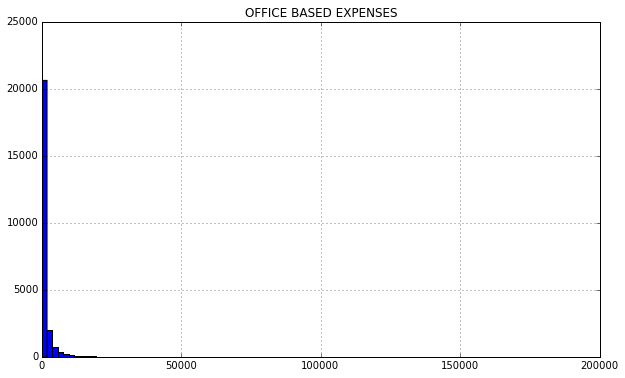

In [40]:
ax=data["TOTAL_OFFICE-BASED_EXP_13"][data["TOTAL_OFFICE-BASED_EXP_13"]>0].hist(bins=100)
ax.set_title("OFFICE BASED EXPENSES")
plt.show()

The graph above is a histogram of billed charges in the dataset. This graph is difficult to read because of the scale. I might try and break it in to a few pieces: one consisting of data points near zero (perhaps one with zero and one with strictly positive values), another consisting of data points that are positive but not too large (say less than 50k or so) and the final piece consisting of the extremely large positive values.

Let's try this:

In [41]:
def zoom_hist(thevar, therange,bin_width=100):
    '''wrapper around df.hist'''
    temp=data[[thevar]+["FINAL_PERSON_WEIGHT_2013"]]
    bins=range(therange[0],therange[1],bin_width)
    ax=temp[thevar].hist(bins=bins,range=therange, weights=temp["FINAL_PERSON_WEIGHT_2013"])
    ax.set_title("%s between $%s and $%s, bin width is $%s"%(thevar,therange[0],therange[1],bin_width))
    ax.set_xlabel("Charges in $")
    ax.set_ylabel("Count")

I want to point out here that the dataset consists of *weighted* points; each point carries a weight (the column is "FINAL_PERSON_WEIGHT_2013") such that when the dataset is scaled out pointwise by these weights, it gives a representative sampling of the U.S. population. Since I do have these weights given to me, I've used these in my histograms to get a more accurate sense of the distribution of these features in the U.S. population.



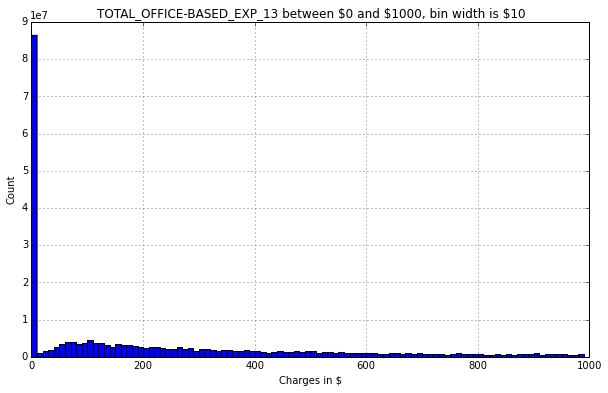

In [42]:
thevar="TOTAL_OFFICE-BASED_EXP_13"
zoom_hist(thevar,therange=[0,1000],bin_width=10)

This graph clearly shows the extent of the zero clustering. It looks like over 80m people are estimated to have expenses of less than $\$10$ - this is about one-fourth of the population.

Next, let's take a look at the same range, but without the mass at 0.

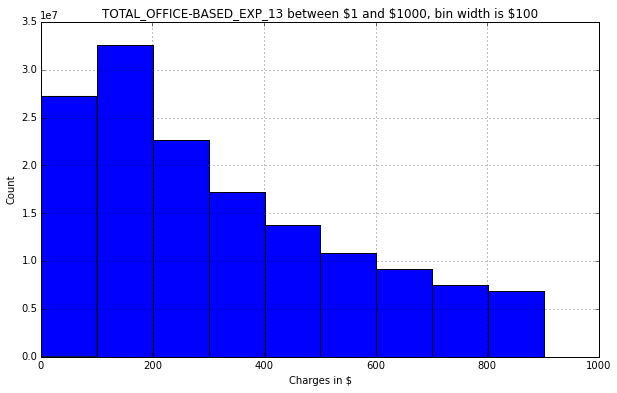

In [43]:
zoom_hist(thevar,therange=[1,1000],bin_width=100)

This shows that the modal nonzero expense for office services is about $\$100-\$200$ dollars, with about 32 million people falling into that bucket.

Let's look further out.

In [44]:
def aggregate(feature,therange):
    temp=data["FINAL_PERSON_WEIGHT_2013"][(data[feature]>=therange[0]) & (data[feature]<=therange[1])]
    return round(temp.sum())

def print_aggregate(feature, therange):
    print("There are %s people in the range %s to %s"%(aggregate(feature,therange),therange[0],therange[1]))

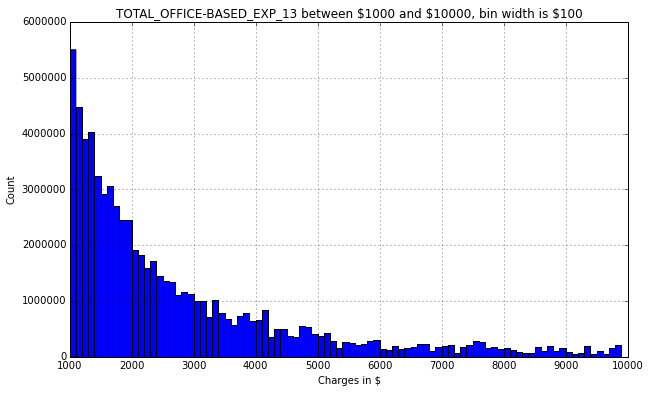

In [45]:
zoom_hist(thevar,therange=[1000,10000],bin_width=100)

In [46]:
print_aggregate(thevar,[0,1000])
print_aggregate(thevar,[1000,3000])
print_aggregate(thevar,[5000,10000])

There are 240259742 people in the range 0 to 1000
There are 49350962 people in the range 1000 to 3000
There are 8539737 people in the range 5000 to 10000


I've used a bin width of $\$100$ again, to keep things consistent. It looks like about 240m people spend less than $\$1000$ a year for office based services. Significant numbers of people (about 50m people) spend between $\$1000$ and $\$3000$ on office based services. After that, each $\$100$ bin contains relatively few people, but these are at fairly high levels of expenditure for an average person or family.

There is quite a bit of mass in the range $\$5000 - \$10,000$. These people, at 8.5 million people, or about $2.7\%$ of the population, are paying a lot for office based healthcare services. It would be interesting to know how much of expenditure at this level is discretionary or non-essential, and how much of it is for relatively routine healthcare - perhaps for badly managed chronic illnesses, etc. In terms of informing policy, there's nothing wrong with the former, but since chronic illness tends to affect a broad section of people - not all of whom can afford to pay upto $\$10,000$ a year for healthcare services, there may be something to worry about if a lot of this high expenditure is for non-discretionary services.

Let's look a bit further:

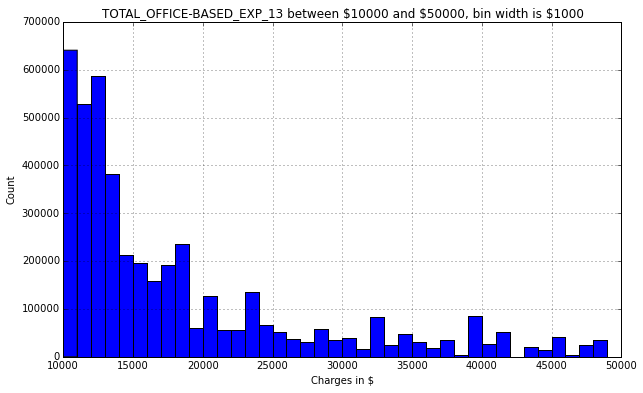

In [47]:
zoom_hist("TOTAL_OFFICE-BASED_EXP_13",therange=[10000,50000],bin_width=1000)

In [48]:
print_aggregate(thevar,[10000,50000])

There are 4452543 people in the range 10000 to 50000


There is significant mass at these higher levels of expenditure - it's a small proportion of the population (4.5 million, or about $1.4\%$ of the population), but the severity of the costs is non-trivial. It will be very interesting to see if we can find out more about what characterizes people who tend to pay this much for healthcare in a year. Do they have terminal illnesses? Badly managed chronic illnesses? Severe accidents?

Let's look at the tail end of the distribution:

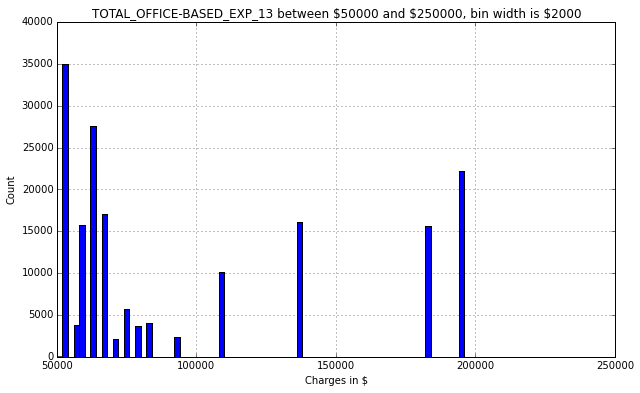

In [49]:
zoom_hist("TOTAL_OFFICE-BASED_EXP_13",therange=[50000,250000],bin_width=2000)

In [50]:
print_aggregate(thevar,[50000,250000])

There are 181340 people in the range 50000 to 250000


There are about 1.8 million people in this range, and the severity of the costs they face is astonishingly high. Again, it will be extremely interesting to know what about these people drives this level of expenditure.


Next, let's take a look at the other three predicted variables, in the following order:

1. Outpatient services
2. Inpatient services
3. Emergency Room services



In [51]:
thevar="TOTAL_OUTPATIENT_PROVIDER_EXP_13"

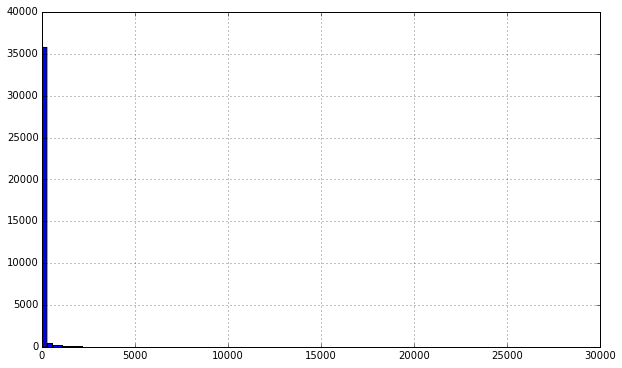

In [52]:
data[thevar].hist(bins=100)

Clearly, there's a lot of zero clustering going on here as well. Let's break it out into pieces like we did for office based services, and see what we find.

There are 310041464 people in the range 0 to 1000


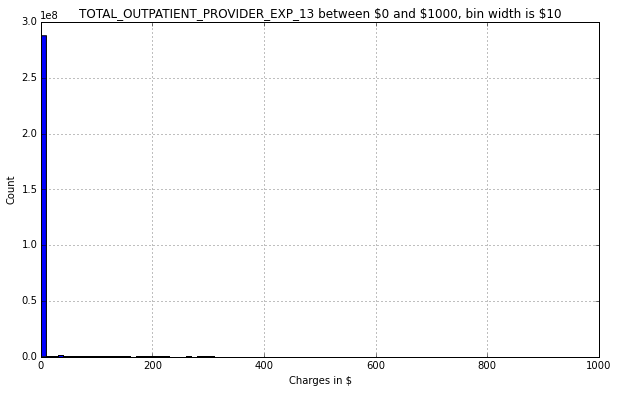

In [53]:
therange=[0,1000]
zoom_hist(thevar,therange,bin_width=10)
print_aggregate(thevar,therange)

It looks like the vast majority of respondents pay less than $\$10$ for outpatient services.

Let's see what happens if we drop the zero payments:

There are 23065896 people in the range 1 to 1000
There are 300065999 people in the range 0 to 200


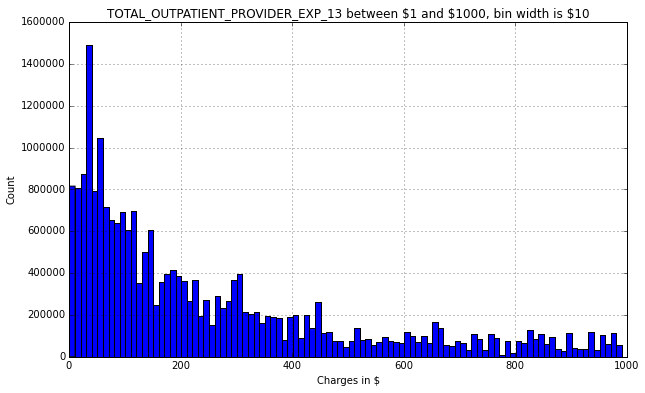

In [54]:
therange=[1,1000]
zoom_hist(thevar,therange,bin_width=10)
print_aggregate(thevar,therange)
print_aggregate(thevar,[0,200])

Of the order of 300m people incur charges of a couple of hundred dollars for outpatient services in the year.

Let's zoom in a bit more to that area and see if we can figure out what the modal charge is.

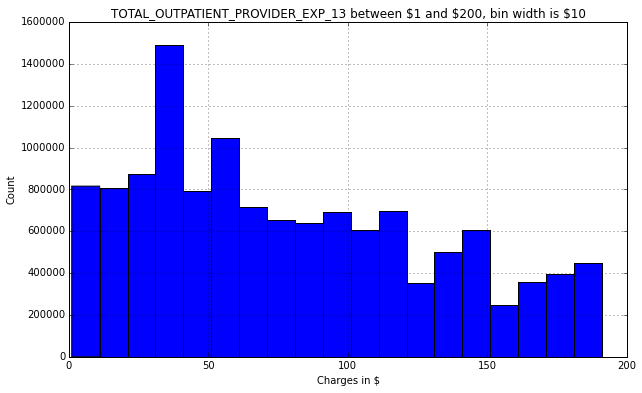

In [55]:
therange=[1,200]
zoom_hist(thevar,therange,bin_width=10)

The modal charge seems to be $\$30-\$40$ dollars for outpatient services. 

Let's now look further to the right to see what the high expenditure cases look like:

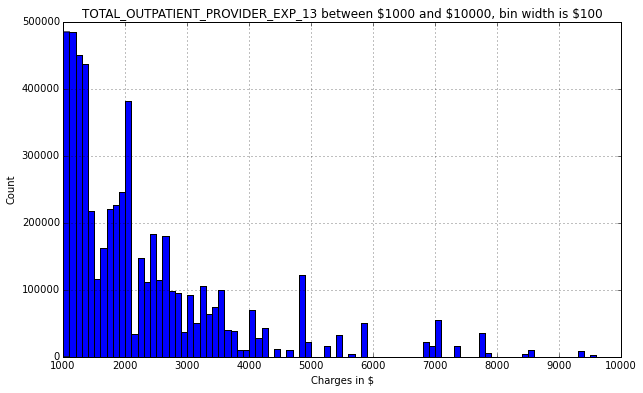

In [56]:
zoom_hist(thevar,therange=[1000,10000],bin_width=100)

In [57]:
print_aggregate(thevar,therange=[1000,10000])
print_aggregate(thevar,therange=[3000,10000])

There are 5603240 people in the range 1000 to 10000
There are 1168142 people in the range 3000 to 10000


There are about 5.6m people in this range, which is about $1.75\%$ of the population. There are about 1.1m people, or $0.34\%$ of respondents that are paying over $\$3,000$ in this range. 

Let's take a look at the rest of the data.

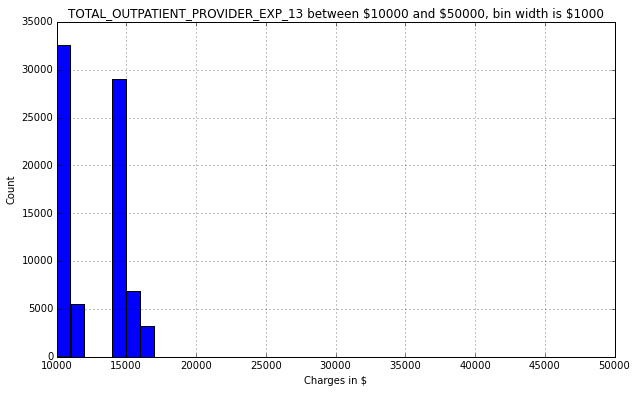

In [58]:
zoom_hist(thevar,therange=[10000,50000],bin_width=1000)

In [59]:
print_aggregate(thevar,therange=[10000,50000])

There are 77278 people in the range 10000 to 50000


Not many people here - about 77,000. The maximum amount paid by any respondent is $\$26,703$, so we won't find mass any further to the right.

It looks like outpatient expenditure follows a similar pattern to office based expenditure, although the severity is less extreme.

Let's turn to inpatient expenditure.

In [60]:
thevar="TOT_HOSP_IP_FACILITY_+_DR_EXP_13"

In [61]:
data[thevar].describe()

count     36940.000000
mean        977.643097
std        7413.503502
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      320929.000000
Name: TOT_HOSP_IP_FACILITY_+_DR_EXP_13, dtype: float64

Alright, so we have a max of about $\$320,000$. That's extremely high!

Let's go through the same steps as before:

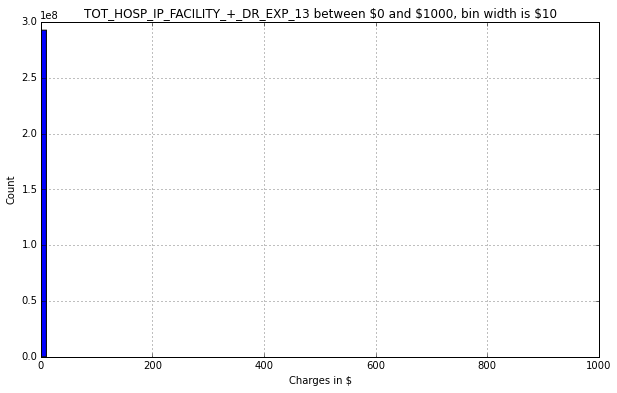

In [62]:
zoom_hist(thevar,therange=[0,1000],bin_width=10)

Again, most people pay less than $\$10$.

What if we drop the mass at 0?

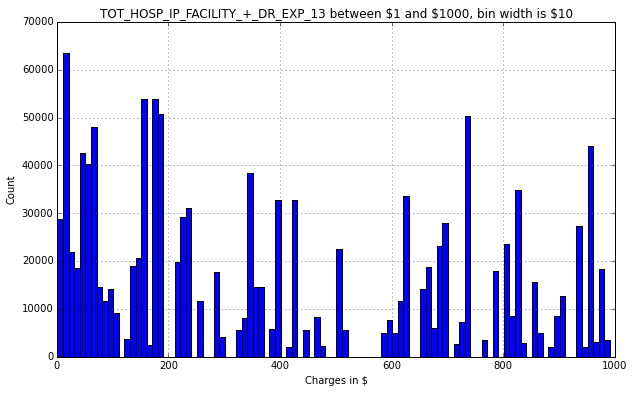

In [63]:
zoom_hist(thevar,therange=[1,1000],bin_width=10)

Let's move out a bit further:

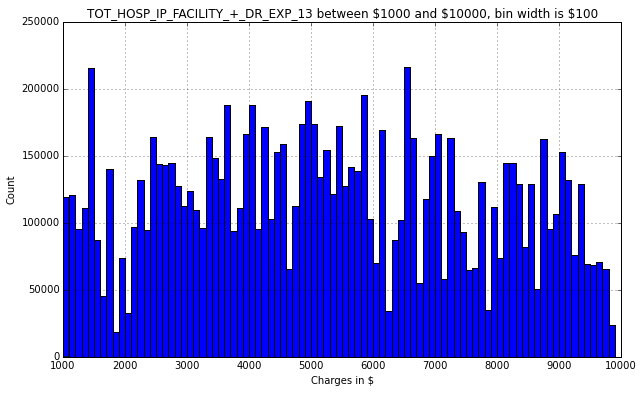

In [64]:
zoom_hist(thevar,therange=[1000,10000],bin_width=100)

Ok, quite a lot of mass in this range. Charges in the thousands of dollars seem more likely in the context of inpatient services, since this usually includes procedures like surgeries.

Let's look out past $\$10,000$.

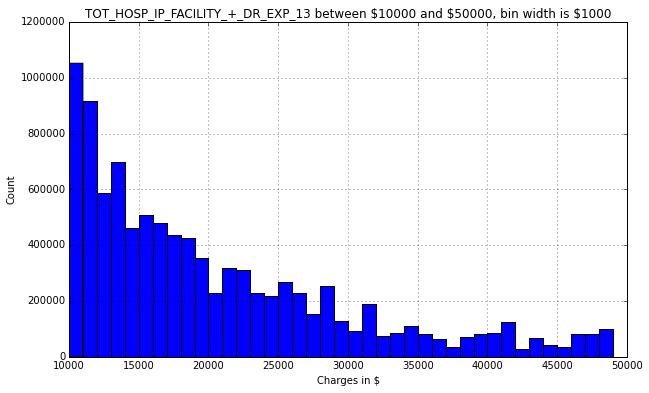

In [65]:
zoom_hist(thevar,therange=[10000,50000],bin_width=1000)

In [66]:
print_aggregate(thevar,therange=[20000,50000])

There are 3910489 people in the range 20000 to 50000


This is consistent with the kinds of amounts we're used to hearing about being charged for surgeries, etc. About 4m people seem to have inpatient services costing over $\$20,000$; these amounts are quite severely high. Let's see if it gets worse for anyone.

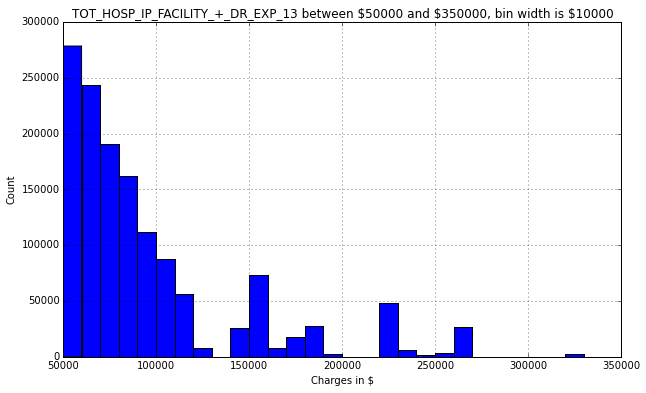

In [67]:
zoom_hist(thevar,therange=[50000,350000],bin_width=10000)

In [68]:
print_aggregate(thevar,therange=[50000,350000])

There are 1381075 people in the range 50000 to 350000


For the 1.4m people in this range, the amounts charged are more than the median household's annual income in the United States. Anyone that falls into this range - and it looks like many people do - will be at great financial risk.

I'd really like to know if the people who end up in this range have anything in common, or whether it's mostly random. Are these life-threatening accidents? Terminal illness? Badly managed chronic illness? Being able to tell the difference, if there is any, could be very informative for healthcare policy, and for advising healthcare consumers about their financial risk.

Let's move on to the final predicted variable, ER expenditure.

In [69]:
thevar="TOTAL_ER_FACILITY_+_DR_EXP_13"

In [70]:
data[thevar].describe()

count    36940.000000
mean       176.546833
std       1029.557499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      63179.000000
Name: TOTAL_ER_FACILITY_+_DR_EXP_13, dtype: float64

The maximum charge for ER services is $\$63,179$. This is a lot lower than the maximum for inpatient services, but still very high.

Let's look at this close up.

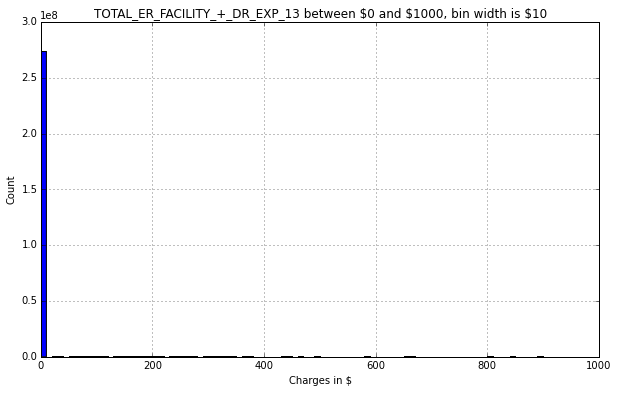

In [71]:
zoom_hist(thevar,therange=[0,1000],bin_width=10)

Fewer people at $\$0$ than for outpatient or inpatient expenditure, but more than for office based expenditure.

Let's drop the $\$0$ charges and see what it looks like.

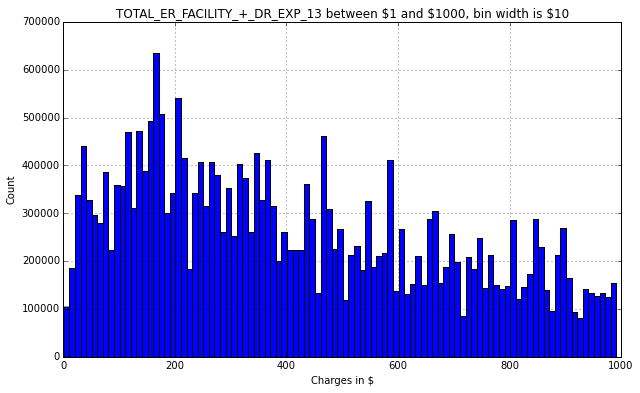

In [72]:
zoom_hist(thevar,therange=[1,1000],bin_width=10)

There are more people in this range than there were for inpatient services, though less than for office based services and outpatient services. A side-by-side comparison:

In [73]:
def compare_hist(therange,bin_width):
    
    bottom=therange[0]
    top=therange[1]
    
    plt.subplot(2,2,1)
    temp=data["TOTAL_OFFICE-BASED_EXP_13"]
    weights=data["FINAL_PERSON_WEIGHT_2013"]
    ax=temp.hist(range=therange,bins=range(bottom,top,bin_width), weights=weights)
    ax.set_title("Office")
    plt.xticks(rotation=45)
    
    plt.subplot(2,2,2)
    temp=data["TOTAL_OUTPATIENT_PROVIDER_EXP_13"]
    ax=temp.hist(range=therange,bins=range(bottom,top,bin_width), weights=weights)
    ax.set_title("Outpatient")
    plt.xticks(rotation=45)

    plt.subplot(2,2,3)
    temp=data["TOT_HOSP_IP_FACILITY_+_DR_EXP_13"]
    weights=data["FINAL_PERSON_WEIGHT_2013"]
    ax=temp.hist(range=therange,bins=range(bottom,top,bin_width), weights=weights)
    ax.set_title("Inpatient")
    plt.xticks(rotation=45)
    
    plt.subplot(2,2,4)
    temp=data["TOTAL_ER_FACILITY_+_DR_EXP_13"]
    weights=data["FINAL_PERSON_WEIGHT_2013"]
    ax=temp.hist(range=therange,bins=range(bottom,top,bin_width), weights=weights)
    ax.set_title("ER")
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

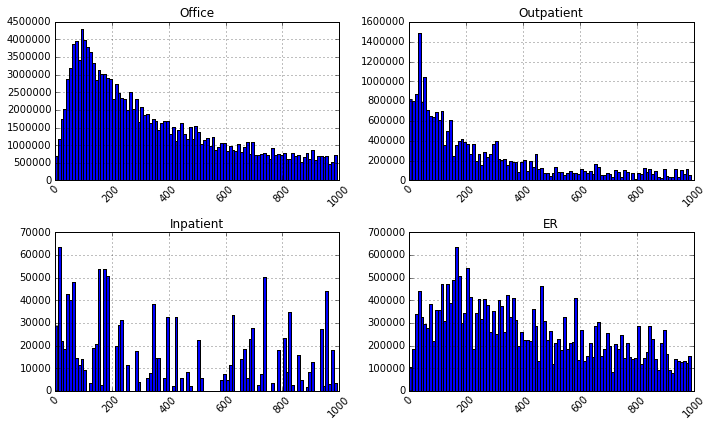

In [74]:
compare_hist([1,1000],10)

While the overall utilization of ER services is lower than for office based services at each cost level, there seem to be many more people using ER services at the higher end of this range than either outpatient or inpatient services.

It's hard to say whether this means anything at this point, but it is interesting nonetheless.

Medical emergencies often come with significant sticker shock, so I'm curious to see what this looks like at much higher levels of expenditure.

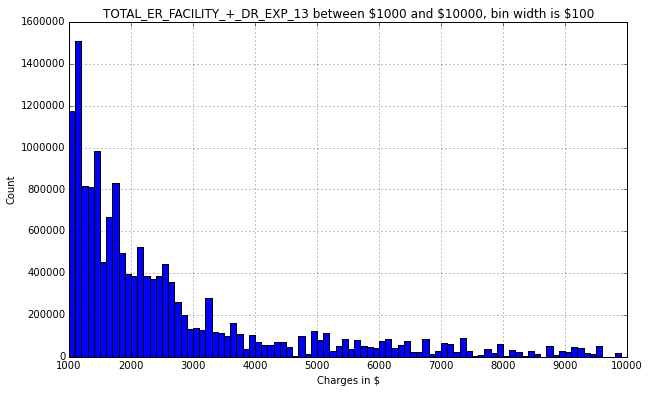

In [75]:
zoom_hist(thevar,therange=[1000,10000],bin_width=100)

Let's go a bit further...

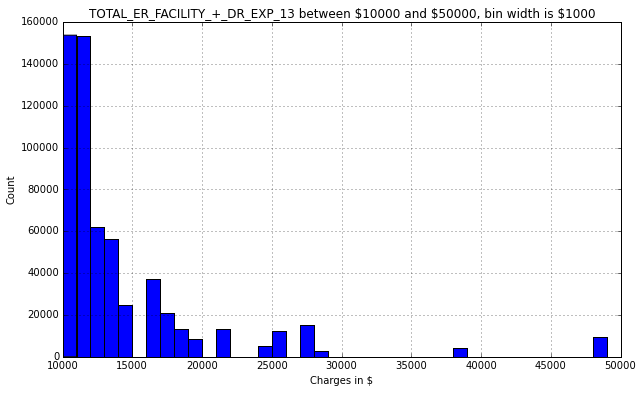

In [76]:
zoom_hist(thevar,therange=[10000,50000],bin_width=1000)

And a bit further ......

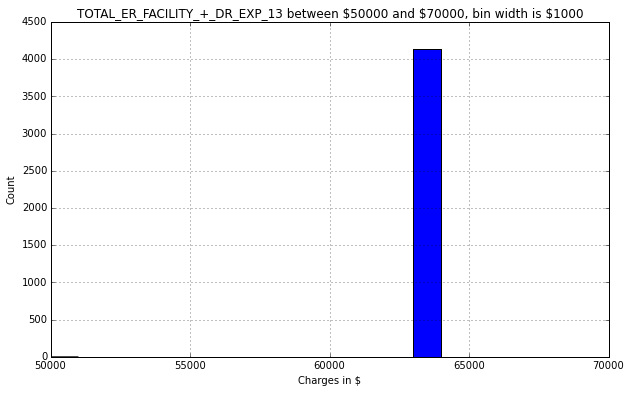

In [77]:
zoom_hist(thevar,therange=[50000,70000],bin_width=1000)

Over 4000 people are estimated to see bills in excess of $\$60,000$ in a year.

I'd like to compare these ranges across categories for a moment.

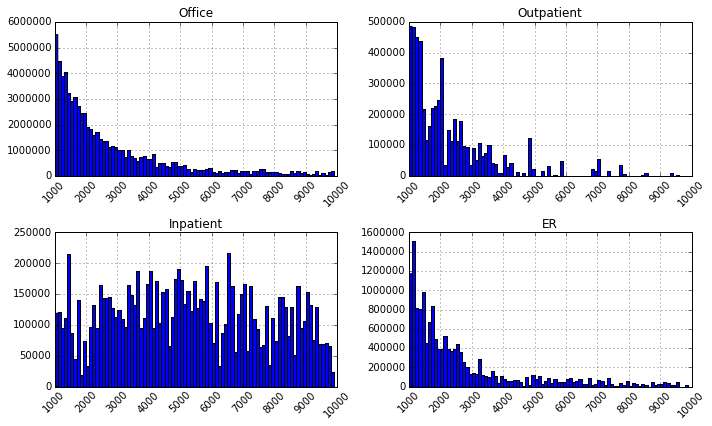

In [78]:
compare_hist([1000,10000],100)

Again, ER services are the second most frequently used at each cost level in the $\$1000 - \$10,000$ range.

Let's look at the $\$10,000 - \$50,000$ range.

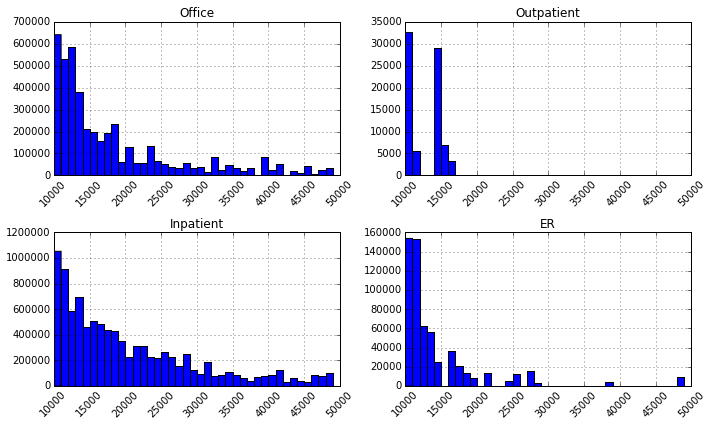

In [79]:
compare_hist([10000,50000],1000)

In the $\$10,000 - \$50,000$ range, ER services give way to inpatient services to become the third most frequently used at each cost level. (This is an approximate statement, I'm not checking each bin.)

Finally, let's look at the tail end:

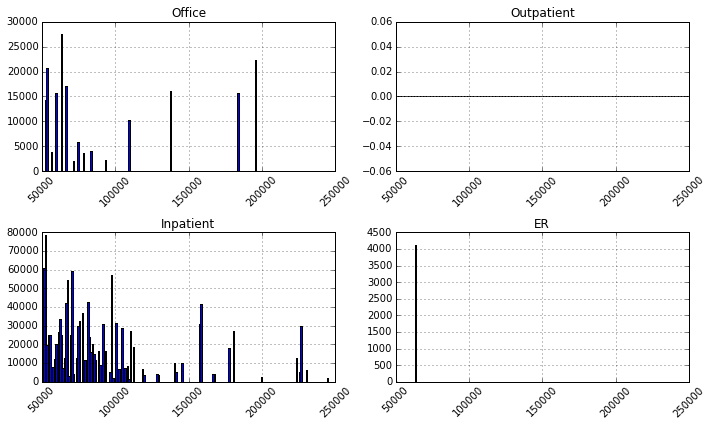

In [80]:
compare_hist([50000,250000],1000)

It looks much the same in this range.

My main takeaway from doing this is that the expenditure for these four location based services follows a reasonable pattern for *most* people. That is, the majority of people will see charges for healthcare expenses that are reasonably insurable if on a plan with a low deductible, but that may bite for the average household on a plan with a relatively high deductible.

One important issue these plots raise is the following: there is a minority of respondents that incur charges for healthcare that are so high as to be clearly financially ruinous for the median household. Questions to ask include:

1. Do the respondents who incur these extremely high charges have the financial means to bear them? Or are they likely to go bankrupt?
2. What characterizes the respondents with extremely high healthcare costs? Do certain illnesses come into play? Do these charges come at random? Are some people at greater risk than others? Would it help anyone if they were advised that they were at elevated financial risk because of some characteristic they have? Should they have a particular health insurance plan? Can I use any of these insights to build a better planning tool?

These are important questions, and it would be fantastic if I could use my Insight project to shed some light on them, whether as part of the modeling process, or (even better) by integrating them into my webapp.

In the next post, I'll take a look at the explanatory variables.